# Fetching Data from PubMed (Entrez API)

In [5]:
import os
import pandas as pd
import time
import random
from Bio import Entrez
from urllib.error import HTTPError

# Set your email for NCBI Entrez API
Entrez.email = "your_email@example.com"

# CSV files with diseases output from CTD-ID:
# python Python/main_gba.py --adj_path ../data/target_disease/cor_matrix_99.csv --s_nodes ../data/target_disease/ad_cor_20.csv
# python Python/main_gba.py --adj_path ../data/target_disease/cor_matrix_99.csv --s_nodes ../data/target_disease/childhoodcancer_cor_20.csv
# python Python/main_gba.py --adj_path ../data/target_disease/cor_matrix_99.csv --s_nodes ../data/target_disease/chd_cor_20.csv
gba_ranks_files = {
    'Alzheimer\'s disease': '../data/target_disease/nolit/ad_cor_20_no_lit_small_0.968_gba_ranks.csv',
    'Childhood cancer': '../data/target_disease/nolit/childhoodcancer_cor_20_no_lit_small_0.977_gba_ranks.csv',
    'Congenital heart disease': '../data/target_disease/nolit/chd_cor_20_no_lit_0.798_gba_ranks.csv'
}

s_files = {
    'Alzheimer\'s disease': '../data/target_disease/nolit/ad_cor_20_no_lit_small.csv',
    'Childhood cancer': '../data/target_disease/nolit/childhoodcancer_cor_20_no_lit_small.csv',
    'Congenital heart disease': '../data/target_disease/nolit/chd_cor_20_no_lit.csv'
}

all_files = [s_files, gba_ranks_files, gba_ranks_files]
subset = ['Disease_module', 'Top', 'Random']

TOP_DISEASE_NUM = 1000

# Function to search PubMed with retries
def search_pubmed_with_retry(disease1, disease2="childhood cancer", max_results=20_000, retries=5, delay=0.5):
    query = f"{disease1} AND {disease2}"
    
    for attempt in range(retries):
        try:
            handle = Entrez.esearch(db="pubmed", term=query, retmax=max_results)
            record = Entrez.read(handle)
            handle.close()
            num_articles = len(record["IdList"])
            print(f"üîç {disease1}: Found {num_articles} articles.")
            return num_articles
        
        except HTTPError as e:
            print(f"‚ö†Ô∏è HTTPError for query '{query}': {e}. Retrying in {delay} seconds...")
        except Exception as e:
            print(f"‚ö†Ô∏è Unexpected error for query '{query}': {e}. Retrying in {delay} seconds...")
        
        time.sleep(delay)
        delay *= 2  # Exponential backoff
    
    print(f"‚ùå Failed to fetch results for '{query}' after {retries} retries.")
    return 0  # Return 0 if all retries fail

# Fetch PubMed Data and Save to CSV
for csv_files, info in zip(all_files, subset):
    for explored_disease, path in csv_files.items():
        # Read first column (disease names)
        df = pd.read_csv(path, usecols=[0])
        if info == 'Disease_module':
            disease_list = df.iloc[:, 0].dropna().tolist()
        elif info == 'Top':
            disease_list = df.iloc[:, 0].dropna().tolist()[:TOP_DISEASE_NUM]
        else:  # Random subset
            disease_list = df.iloc[:, 0].dropna().tolist()[100:]
            disease_list = random.sample(disease_list, min(TOP_DISEASE_NUM, len(disease_list)))

        # Format disease names
        disease_list = [x.replace('_', ' ').replace('.', ' ') for x in disease_list]

        # Query PubMed for each disease
        results = []
        for disease in disease_list:
            num_articles = search_pubmed_with_retry(disease, explored_disease)
            results.append({"Disease": disease, "Articles": num_articles})
            time.sleep(0.3)  # Sleep to prevent rate limiting

        # Convert to DataFrame and save results
        df_results = pd.DataFrame(results)
        df_results.to_csv(f"{explored_disease.replace(' ', '_')}_pubmed_results_nolit_{info}.csv", index=False)

print("‚úÖ Data fetching complete. CSV files saved.")


üîç Parkinson disease: Found 9999 articles.
üîç multiple sclerosis: Found 5108 articles.
üîç infection: Found 7514 articles.
üîç neoplasm: Found 5129 articles.
üîç Cognitive impairment: Found 9999 articles.
üîç cancer: Found 9999 articles.
üîç insulin resistance: Found 2183 articles.
üîç Stroke: Found 9999 articles.
üîç Sepsis: Found 289 articles.
üîç atherosclerosis: Found 2102 articles.
üîç breast cancer: Found 877 articles.
üîç Obesity: Found 2869 articles.
üîç Huntington disease: Found 5478 articles.
üîç diabetes mellitus: Found 4828 articles.
üîç myeloid sarcoma: Found 2 articles.
üîç ischemia: Found 3959 articles.
üîç melanoma: Found 193 articles.
üîç Rheumatoid arthritis: Found 670 articles.
üîç chronic obstructive pulmonary disease: Found 344 articles.
üîç Insulin resistance: Found 2183 articles.
üîç major salivary gland cancer: Found 21 articles.
üîç functioning pituitary gland adenoma: Found 494 articles.
üîç diffuse intrinsic pontine glioma: Found 149 

üîç mucous membrane pemphigoid: Found 1 articles.
üîç Hyperglycemia: Found 570 articles.
üîç lung adenocarcinoma: Found 37 articles.
üîç acute lung injury: Found 45 articles.
üîç in situ carcinoma: Found 12 articles.
üîç long COVID 19: Found 0 articles.
üîç influenza: Found 238 articles.
üîç head and neck malignant neoplasia: Found 24 articles.
üîç sarcoidosis: Found 22 articles.
üîç Hyperinsulinemia: Found 1172 articles.
üîç colorectal neoplasm: Found 182 articles.
üîç oral squamous cell carcinoma: Found 21 articles.
üîç osteosarcoma: Found 21 articles.
üîç ovarian cancer: Found 149 articles.
üîç Vitiligo: Found 14 articles.
üîç acute myocardial infarction: Found 111 articles.
üîç synovial sarcoma: Found 1 articles.
üîç gastric cancer: Found 160 articles.
üîç Parkinsonism: Found 9999 articles.
üîç esophageal squamous cell carcinoma: Found 3 articles.
üîç lymph node metastatic carcinoma: Found 5 articles.
üîç urinary bladder carcinoma: Found 5 articles.
üîç poste

üîç AIDS: Found 977 articles.
üîç meningioma: Found 45 articles.
üîç laryngotracheoesophageal cleft: Found 0 articles.
üîç rectum cancer: Found 13 articles.
üîç skin squamous cell carcinoma: Found 12 articles.
üîç cyst: Found 9999 articles.
üîç substance dependence: Found 687 articles.
üîç pulmonary tuberculosis: Found 24 articles.
üîç cocaine dependence: Found 18 articles.
üîç ovarian serous adenocarcinoma: Found 1 articles.
üîç arteriosclerosis: Found 4480 articles.
üîç Onset: Found 9999 articles.
üîç heart disease: Found 6090 articles.
üîç Infantile dystonia parkinsonism: Found 1 articles.
üîç squamous cell lung carcinoma: Found 23 articles.
üîç spindle cell hemangioma: Found 0 articles.
üîç alcohol dependence: Found 484 articles.
üîç kidney neoplasm: Found 119 articles.
üîç SATB2 associated disorder: Found 2 articles.
üîç alcoholic fatty liver disease: Found 155 articles.
üîç liver and intrahepatic bile duct neoplasm: Found 0 articles.
üîç Acute Leukemia: Foun

üîç allergic asthma: Found 39 articles.
üîç Thymoma: Found 13 articles.
üîç HER2 Positive Breast Carcinoma: Found 1 articles.
üîç carcinoma of liver and intrahepatic biliary tract: Found 0 articles.
üîç Duodenal Adenocarcinoma: Found 2 articles.
üîç endometrioid carcinoma: Found 1 articles.
üîç uterine corpus endometrial carcinoma: Found 0 articles.
üîç Spinal Cord Ischemia: Found 112 articles.
üîç oral cavity carcinoma: Found 10 articles.
üîç Escherichia coli Infections: Found 18 articles.
üîç pulpitis: Found 3 articles.
üîç Creutzfeldt Jacob Disease: Found 829 articles.
üîç acute promyelocytic leukemia: Found 8 articles.
üîç ischemic cardiomyopathy: Found 44 articles.
üîç retinal ischemia: Found 62 articles.
üîç bile duct adenocarcinoma: Found 0 articles.
üîç chronic hepatitis C virus infection: Found 6 articles.
üîç visceral Leishmaniasis: Found 1 articles.
üîç B cell acute lymphoblastic leukemia: Found 2 articles.
üîç undifferentiated pleomorphic sarcoma: Found 

üîç reading: Found 1162 articles.
üîç metastatic colorectal cancer: Found 27 articles.
üîç maternal uniparental disomy of chromosome 20: Found 0 articles.
üîç genetic disorder: Found 7581 articles.
üîç hemangioblastoma: Found 3 articles.
üîç infertility: Found 96 articles.
üîç medullary thyroid gland carcinoma: Found 0 articles.
üîç alcoholic liver cirrhosis: Found 35 articles.
üîç intermittent vascular claudication: Found 4 articles.
üîç Gastric Adenoma: Found 3 articles.
üîç telomere syndrome: Found 38 articles.
üîç glycogen storage disease VI: Found 0 articles.
üîç tongue cancer: Found 6 articles.
üîç nasopharyngeal squamous cell carcinoma: Found 1 articles.
üîç ulnar mammary syndrome: Found 0 articles.
üîç primitive neuroectodermal tumor: Found 1549 articles.
üîç metaplastic breast carcinoma: Found 0 articles.
üîç Malignant Mesothelioma: Found 6 articles.
üîç colorectal adenoma: Found 7 articles.
üîç Machado Joseph disease: Found 49 articles.
üîç renal carcinom

üîç Delusion: Found 1021 articles.
üîç hemangioma: Found 16 articles.
üîç immunodeficiency 73b with defective neutrophil chemotaxis and lymphopenia: Found 0 articles.
üîç social anxiety disorder: Found 127 articles.
üîç crescentic glomerulonephritis: Found 2 articles.
üîç tropical spastic paraparesis: Found 3 articles.
üîç glucose metabolism disease: Found 5256 articles.
üîç Pancreatic Acinar Cell Carcinoma: Found 0 articles.
üîç cholesteatoma: Found 2 articles.
üîç Myelopathy: Found 2799 articles.
üîç follicular thyroid carcinoma: Found 0 articles.
üîç skin disease: Found 1870 articles.
üîç neoplasm of mature B cells: Found 0 articles.
üîç Apathy: Found 1448 articles.
üîç lymphedema: Found 11 articles.
üîç papillary carcinoma: Found 6 articles.
üîç Methicillin Resistant Staphylococcus Aureus Infection: Found 8 articles.
üîç vitamin deficiency: Found 914 articles.
üîç familial isolated deficiency of vitamin E: Found 4 articles.
üîç measles: Found 59 articles.
üîç a

üîç loiasis: Found 0 articles.
üîç childhood central nervous system germ cell tumor: Found 1386 articles.
üîç panuveitis: Found 13 articles.
üîç Borderline Ovarian Surface Epithelial Stromal Tumor: Found 0 articles.
üîç functional pancreatic neuroendocrine tumor: Found 24 articles.
üîç chronic monocytic leukemia: Found 3864 articles.
üîç adult hepatocellular carcinoma: Found 153 articles.
üîç metastatic colorectal cancer: Found 54 articles.
üîç verrucous carcinoma: Found 13 articles.
üîç malignant renal pelvis neoplasm: Found 43 articles.
üîç thymus cancer: Found 174 articles.
üîç anterior pituitary gland disorder: Found 10 articles.
üîç chromophobe adenoma: Found 8 articles.
üîç adult acute lymphoblastic leukemia: Found 2277 articles.
üîç lymphoblastic lymphoma: Found 8849 articles.
üîç Subcutaneous hemorrhage: Found 108 articles.
üîç peripheral hypothyroidism: Found 2 articles.
üîç sella turcica neoplasm: Found 29 articles.
üîç inverted papilloma: Found 4 articles.

üîç brain oligodendroglioma: Found 70 articles.
üîç protein energy malnutrition: Found 17 articles.
üîç thymus neoplasm: Found 156 articles.
üîç T lymphoblastic lymphoma: Found 5553 articles.
üîç rectocele: Found 0 articles.
üîç urethra cancer: Found 44 articles.
üîç ACTH producing pituitary gland neoplasm: Found 7 articles.
üîç diabetic autonomic neuropathy: Found 1 articles.
üîç thyroid nodule: Found 170 articles.
üîç intracranial hypertension: Found 87 articles.
üîç Colorectal Gastrointestinal Stromal Tumor: Found 6 articles.
üîç non Langerhans cell histiocytosis: Found 222 articles.
üîç HIV Associated Lipodystrophy Syndrome: Found 0 articles.
üîç Angioleiomyoma: Found 2 articles.
üîç aromatase excess syndrome: Found 0 articles.
üîç childhood T acute lymphoblastic leukemia: Found 1061 articles.
üîç neuroendocrine disorder: Found 209 articles.
üîç Infertility: Found 739 articles.
üîç Abruptio Placentae: Found 2 articles.
üîç pituitary adenocarcinoma: Found 8 artic

üîç adrenal gland neoplasm: Found 546 articles.
üîç Trichomegaly  retina pigmentary degeneration  dwarfism: Found 0 articles.
üîç Dyspareunia: Found 2 articles.
üîç peritoneal neoplasm: Found 190 articles.
üîç peripheral neurotoxicity: Found 37 articles.
üîç Ovarian cyst: Found 291 articles.
üîç adenomyoma: Found 4 articles.
üîç meningeal neoplasm: Found 542 articles.
üîç Endometrial Polyp: Found 5 articles.
üîç congenital adrenal hyperplasia: Found 66 articles.
üîç Ehlers Danlos syndrome: Found 3 articles.
üîç Central Nervous System Neoplasm: Found 7274 articles.
üîç Hirsutism: Found 31 articles.
üîç prolymphocytic leukemia: Found 5 articles.
üîç Disseminated Peritoneal Leiomyomatosis: Found 0 articles.
üîç SIM1 related Prader Willi like syndrome: Found 0 articles.
üîç Premature ejaculation: Found 0 articles.
üîç classic congenital adrenal hyperplasia due to 21 hydroxylase deficiency: Found 4 articles.
üîç lymphoma: Found 9999 articles.
üîç transitional cell carcin

üîç blastic plasmacytoid dendritic cell neoplasm: Found 8 articles.
üîç pulmonary large cell neuroendocrine carcinoma: Found 2 articles.
üîç Fatigue: Found 403 articles.
üîç neoplasm of esophagus: Found 106 articles.
üîç ganglioneuroblastoma: Found 104 articles.
üîç pancreatic ductal adenocarcinoma: Found 16 articles.
üîç liposarcoma: Found 78 articles.
üîç oligoastrocytoma: Found 88 articles.
üîç mucosal melanoma: Found 12 articles.
üîç cervical squamous cell carcinoma: Found 91 articles.
üîç Transitional Cell Carcinoma: Found 30 articles.
üîç pericarditis: Found 19 articles.
üîç anaplastic ependymoma: Found 605 articles.
üîç Mobius syndrome: Found 1 articles.
üîç intrahepatic cholangiocarcinoma: Found 36 articles.
üîç undifferentiated carcinoma: Found 3547 articles.
üîç anaplastic astrocytoma: Found 1109 articles.
üîç Malignant Ovarian Mixed Epithelial Tumor: Found 5 articles.
üîç tonsil cancer: Found 40 articles.
üîç Kaposi s sarcoma: Found 136 articles.
üîç Cut

üîç Tracheal Squamous Cell Carcinoma: Found 5 articles.
üîç sebaceous adenocarcinoma: Found 2 articles.
üîç cholangiocarcinoma: Found 38 articles.
üîç Transitional Meningioma: Found 394 articles.
üîç astrocytic tumor: Found 1134 articles.
üîç salivary gland carcinoma: Found 63 articles.
üîç synovial sarcoma: Found 107 articles.
üîç gastric carcinoma: Found 115 articles.
üîç ovarian serous carcinoma: Found 11 articles.
üîç thymic epithelial neoplasm: Found 1 articles.
üîç lymph node cancer: Found 989 articles.
üîç Nijmegen breakage syndrome: Found 30 articles.
üîç Neoplasm of the lung: Found 1458 articles.
üîç laryngeal squamous cell carcinoma: Found 76 articles.
üîç papillary serous cystadenocarcinoma: Found 5 articles.
üîç vaginal cancer: Found 181 articles.
üîç Anal Squamous Cell Carcinoma: Found 3 articles.
üîç skin reaction: Found 126 articles.
üîç Alopecia: Found 73 articles.
üîç Atypical Lipomatous Tumor: Found 72 articles.
üîç glioma: Found 3200 articles.
ü

üîç insulin resistance: Found 378 articles.
üîç squamous cell carcinoma of pancreas: Found 4 articles.
üîç bile duct adenocarcinoma: Found 35 articles.
üîç Lung Giant Cell Carcinoma: Found 2 articles.
üîç neurofibromatosis type 1: Found 547 articles.
üîç gestational diabetes: Found 99 articles.
üîç Pleural Mesothelioma: Found 65 articles.
üîç Insulin resistance: Found 378 articles.
üîç schwannoma: Found 213 articles.
üîç Guillain Barre syndrome: Found 19 articles.
üîç tongue cancer: Found 106 articles.
üîç jejunal neoplasm: Found 29 articles.
üîç Cirrhosis: Found 594 articles.
üîç Refractory drug response: Found 1720 articles.
üîç lipomatous cancer: Found 31 articles.
üîç precursor B cell acute lymphoblastic leukemia: Found 765 articles.
üîç AIDS dementia: Found 3 articles.
üîç interstitial lung disease: Found 236 articles.
üîç gastric intestinal type adenocarcinoma: Found 5 articles.
üîç mucoepidermoid carcinoma: Found 83 articles.
üîç posterior cortical atrophy: 

üîç Preauricular skin tag: Found 3 articles.
üîç conotruncal heart malformations: Found 206 articles.
üîç hypoplastic left heart syndrome 1: Found 2181 articles.
üîç atrioventricular septal defect 5: Found 741 articles.
üîç aortic valve disease: Found 9999 articles.
üîç Meacham syndrome: Found 3 articles.
üîç genito palato cardiac syndrome: Found 2 articles.
üîç double outlet right ventricle: Found 2235 articles.
üîç hypoplastic left heart syndrome 2: Found 2135 articles.
üîç atrial septal defect 8: Found 4060 articles.
üîç Laubry Pezzi syndrome: Found 16 articles.
üîç ventricular septal defect 2: Found 8654 articles.
üîç Dextrocardia: Found 3505 articles.
üîç lung agenesis heart defect thumb anomalies syndrome: Found 4 articles.
üîç interventricular septum aneurysm: Found 439 articles.
üîç Lung agenesis  heart defect  thumb anomalies: Found 4 articles.
üîç Genetic syndrome with a Dandy Walker malformation as major feature: Found 0 articles.
üîç umbilical cord ulcerat

üîç sinoatrial node dysfunction and deafness: Found 5 articles.
üîç long QT syndrome 5: Found 8 articles.
üîç dilated cardiomyopathy 1II: Found 0 articles.
üîç long QT syndrome 9: Found 6 articles.
üîç arrhythmogenic right ventricular dysplasia 10: Found 526 articles.
üîç Eisenmenger syndrome: Found 1580 articles.
üîç distal trisomy 14q: Found 5 articles.
üîç Familial progressive cardiac conduction defect: Found 6 articles.
üîç situs inversus: Found 4104 articles.
üîç Familial short QT syndrome: Found 165 articles.
üîç Wolff Parkinson White Syndrome: Found 5854 articles.
üîç transketolase deficiency: Found 1 articles.
üîç hypertrophic cardiomyopathy 26: Found 123 articles.
üîç Psammomatous Meningioma: Found 18 articles.
üîç cardiac conduction defect: Found 9999 articles.
üîç Brugada syndrome 3: Found 1 articles.
üîç Romano Ward syndrome: Found 319 articles.
üîç Moyamoya disease 5: Found 27 articles.
üîç Atrial tachyarrhythmia with short PR interval: Found 0 articles.

üîç Myocardial fibrosis: Found 815 articles.
üîç Combined oxidative phosphorylation defect type 23: Found 0 articles.
üîç Left bundle branch block: Found 1681 articles.
üîç Fryns syndrome: Found 49 articles.
üîç Poor coordination: Found 24 articles.
üîç MYPN related myopathy: Found 3 articles.
üîç Dilated cardiomyopathy with ataxia: Found 5 articles.
üîç Microcephaly  cardiomyopathy: Found 6 articles.
üîç Williams syndrome: Found 647 articles.
üîç Holoprosencephaly  postaxial polydactyly: Found 11 articles.
üîç Progressive hearing impairment: Found 122 articles.
üîç autosomal recessive limb girdle muscular dystrophy type 2N: Found 0 articles.
üîç microcephaly cardiomyopathy syndrome: Found 5 articles.
üîç Czeizel Losonci syndrome: Found 0 articles.
üîç Kallmann syndrome heart disease syndrome: Found 29 articles.
üîç PHAVER syndrome: Found 2 articles.
üîç holoprosencephaly postaxial polydactyly syndrome: Found 10 articles.
üîç distal myopathy with posterior leg and ant

üîç ulcerative colitis: Found 40 articles.
üîç X linked intellectual disability cardiomegaly congestive heart failure syndrome: Found 1 articles.
üîç endometriosis: Found 34 articles.
üîç carcinoma: Found 625 articles.
üîç head and neck squamous cell carcinoma: Found 3 articles.
üîç autosomal recessive limb girdle muscular dystrophy type 2B: Found 0 articles.
üîç Triose phosphate isomerase deficiency: Found 1 articles.
üîç acute myeloid leukemia: Found 96 articles.
üîç lymph node metastatic carcinoma: Found 3 articles.
üîç lumbar disc degeneration: Found 1 articles.
üîç myeloid sarcoma: Found 1 articles.
üîç osteosarcoma: Found 25 articles.
üîç Glomerulonephritis: Found 145 articles.
üîç triple negative breast cancer: Found 2 articles.
üîç pneumonitis: Found 1909 articles.
üîç experimental autoimmune encephalomyelitis: Found 1 articles.
üîç glioma: Found 52 articles.
üîç axial length measurement: Found 29 articles.
üîç pancreatic neoplasm: Found 29 articles.
üîç Myo

üîç Dysmorphism  conductive hearing loss  heart defect: Found 123 articles.
üîç acquired cutis laxa: Found 3 articles.
üîç intermittent hydrarthrosis: Found 0 articles.
üîç cholesteatoma of attic: Found 3 articles.
üîç Triangular face: Found 29 articles.
üîç Wide nasal bridge: Found 34 articles.
üîç malignant struma ovarii: Found 0 articles.
üîç Abnormal sternum morphology: Found 336 articles.
üîç Chagas cardiomyopathy: Found 51 articles.
üîç Pericallosal lipoma: Found 0 articles.
üîç Middle Ear Squamous Cell Carcinoma: Found 0 articles.
üîç lung PEComa: Found 2 articles.
üîç X linked intellectual disability  hypotonic face: Found 1 articles.
üîç abdominal obesity metabolic syndrome: Found 0 articles.
üîç Ureaplasma urealyticum urethritis: Found 0 articles.
üîç dystocia: Found 13 articles.
üîç central nervous system tuberculosis: Found 10 articles.
üîç Fulminant hepatitis: Found 1 articles.
üîç ATR X related syndrome: Found 2 articles.
üîç Dermatochalasis: Found 60 

üîç gondoic acid measurement: Found 0 articles.
üîç infective arthritis: Found 39 articles.
üîç Multiple renal cysts: Found 31 articles.
üîç Respiratory failure requiring assisted ventilation: Found 16 articles.
üîç Delayed ability to walk: Found 4 articles.
üîç Anterior creases of earlobe: Found 0 articles.
üîç choroiditis: Found 132 articles.
üîç Underdeveloped nasal alae: Found 0 articles.
üîç sugar sweetened beverage consumption measurement: Found 2 articles.
üîç non grapefruit juice consumption measurement: Found 0 articles.
üîç malignant choroid melanoma: Found 1 articles.
üîç immuno osseous dysplasia: Found 0 articles.
üîç Baraitser Winter cerebrofrontofacial syndrome: Found 3 articles.
üîç Ameloblastic Carcinoma: Found 0 articles.
üîç Congenital chloride diarrhea: Found 1 articles.
üîç intraocular medulloepithelioma: Found 0 articles.
üîç iniencephaly: Found 1131 articles.
üîç cutis laxa  Marfanoid syndrome: Found 2 articles.
üîç aphonia deafness retinal dyst

üîç Finger syndactyly: Found 55 articles.
üîç macular retinal edema: Found 8 articles.
üîç Premature atrial contractions: Found 247 articles.
üîç Anophthalmia: Found 75 articles.
üîç renovascular hypertension: Found 1 articles.
üîç Salmonella gastroenteritis: Found 0 articles.
üîç congenital disorder of glycosylation type II: Found 0 articles.
üîç fibroblast growth factor 10 measurement: Found 0 articles.
üîç Chagas disease: Found 134 articles.
üîç hereditary spastic paraplegia 30: Found 3 articles.
üîç Lattice retinal degeneration: Found 1 articles.
üîç Abnormal sperm tail morphology: Found 0 articles.
üîç coloboma of eye lens: Found 0 articles.
üîç Cerebellar vermis hypoplasia: Found 2 articles.
üîç Rolandic epilepsy: Found 3 articles.
üîç dopa responsive dystonia due to sepiapterin reductase deficiency: Found 0 articles.
üîç pterygium: Found 3 articles.
üîç muscular channelopathy: Found 1 articles.
üîç Beemer Langer syndrome: Found 0 articles.
üîç lysophosphatidy

üîç hereditary intestinal polyposis: Found 1 articles.
üîç hereditary spastic paraplegia 5A: Found 1 articles.
üîç Greenberg dysplasia: Found 0 articles.
üîç Connective tissue disorder due to lysyl hydroxylase 3 deficiency: Found 0 articles.
üîç Epiretinal membrane: Found 1 articles.
üîç Tracheal Adenoid Cystic Carcinoma: Found 0 articles.
üîç keratoconus: Found 5 articles.
üîç cystadenoma: Found 1 articles.
üîç distal monosomy 1q: Found 0 articles.
üîç idiopathic bronchiectasis: Found 0 articles.
üîç glottis neoplasm: Found 1 articles.
üîç cystadenofibroma: Found 0 articles.
üîç invasive tubular breast carcinoma: Found 0 articles.
üîç pontocerebellar hypoplasia type 3: Found 0 articles.
üîç Primary intraosseous vascular malformation: Found 0 articles.
üîç Congenital finger flexion contractures: Found 0 articles.
üîç autonomic nervous system neoplasm: Found 11 articles.
üîç serum albumin measurement: Found 179 articles.
üîç Cowden syndrome 7: Found 0 articles.
üîç c

üîç short stature and microcephaly with genital anomalies: Found 0 articles.
üîç Gastric Neuroendocrine Tumor G1: Found 0 articles.
üîç Abnormal lens morphology: Found 11 articles.
üîç shortness of breath: Found 44 articles.
üîç fallopian tube cancer: Found 1 articles.
üîç malignant peripheral nerve sheath tumor: Found 0 articles.
üîç respiratory system cancer: Found 267 articles.
üîç congenital insensitivity to pain hypohidrosis syndrome: Found 0 articles.
üîç Pleuropulmonary blastoma: Found 0 articles.
üîç acquired adult onset immunodeficiency: Found 4 articles.
üîç myofibrillar myopathy 7: Found 0 articles.
üîç glycogen storage disease IXd: Found 0 articles.
üîç Vascular dilatation: Found 174 articles.
üîç oculocutaneous albinism type 3: Found 0 articles.
üîç megacystis microcolon intestinal hypoperistalsis syndrome 3: Found 0 articles.
üîç nephrolithiasis susceptibility caused by SLC26A1: Found 0 articles.
üîç purulent acute otitis media: Found 0 articles.
üîç lip

üîç Recurrent fractures: Found 48 articles.
üîç SPONASTRIME dysplasia: Found 0 articles.
üîç congenital heart block: Found 0 articles.
üîç spinocerebellar ataxia type 28: Found 0 articles.
üîç recurrent Neisseria infections due to factor D deficiency: Found 0 articles.
üîç interleukin 11 receptor subunit alpha measurement: Found 0 articles.
üîç X linked intellectual disability hypotonia movement disorder syndrome: Found 0 articles.
üîç tuberculosis: Found 158 articles.
üîç chromosome 15q13 3 microdeletion syndrome: Found 1 articles.
üîç Floor of Mouth Mucoepidermoid Carcinoma: Found 0 articles.
üîç Hypochromic anemia: Found 9 articles.
üîç pervasive developmental disorder  not otherwise specified: Found 345 articles.
üîç squamous cell carcinoma of penis: Found 0 articles.
üîç nephrosclerosis: Found 3 articles.
üîç Short chin: Found 17 articles.
üîç acute adrenal insufficiency: Found 3 articles.
üîç absence of fingerprints congenital milia syndrome: Found 0 articles.
ü

üîç optic neuritis: Found 56 articles.
üîç bladder papillary urothelial carcinoma: Found 2 articles.
üîç Central Cord Syndrome: Found 26 articles.
üîç TWIST1 related craniosynostosis: Found 0 articles.
üîç Colon Juvenile Polyp: Found 0 articles.
üîç brachydactyly type B: Found 0 articles.
üîç wet beriberi: Found 0 articles.
üîç Chorea: Found 1435 articles.
üîç skin sensitivity to sun: Found 6 articles.
üîç early onset Lafora body disease: Found 2 articles.
üîç generalized resistance to thyroid hormone: Found 0 articles.
üîç childhood epithelioid sarcoma: Found 1 articles.
üîç cognitive inhibition measurement: Found 816 articles.
üîç Microduplication Xp11 22 p11 23 syndrome: Found 0 articles.
üîç familial congenital mirror movements: Found 0 articles.
üîç complement component 4a deficiency: Found 0 articles.
üîç Galloway Mowat syndrome: Found 0 articles.
üîç malignant teratoma of testis: Found 0 articles.
üîç nicotine use: Found 763 articles.
üîç Endometritis: Found 

üîç MAP kinase activated protein kinase 3 measurement: Found 79 articles.
üîç Tritanopia: Found 21 articles.
üîç atypical ductal hyperplasia: Found 2 articles.
üîç hip geometry: Found 0 articles.
üîç mandibular cancer: Found 3 articles.
üîç ALG2 congenital disorder of glycosylation: Found 0 articles.
üîç rhabdomyosarcoma of the cervix uteri: Found 0 articles.
üîç uterine body mixed cancer: Found 0 articles.
üîç ophthalmic herpes zoster: Found 3 articles.
üîç recurrent metabolic encephalomyopathic crises rhabdomyolysis cardiac arrhythmia intellectual disability syndrome: Found 0 articles.
üîç Ovarian Sertoli Leydig Cell Tumor: Found 0 articles.
üîç minimally differentiated acute myeloblastic leukemia: Found 0 articles.
üîç spermatogenic failure 74: Found 0 articles.
üîç gastrointestinal lymphoma: Found 7 articles.
üîç Bangstad syndrome: Found 0 articles.
üîç long chain acyl CoA dehydrogenase deficiency: Found 0 articles.
üîç Disseminated intravascular coagulation: Found

üîç Anonychia  onychodystrophy: Found 0 articles.
üîç hyperprolactinemia: Found 8 articles.
üîç lycopene measurement: Found 15 articles.
üîç Limb dystonia: Found 219 articles.
üîç cranial nerve neuropathy: Found 19 articles.
üîç female genital tuberculosis: Found 0 articles.
üîç childhood acute myeloid leukemia: Found 0 articles.
üîç STING associated vasculopathy with onset in infancy: Found 0 articles.
üîç interleukin 22 receptor subunit alpha 2 measurement: Found 0 articles.
üîç intoxication: Found 241 articles.
üîç paternal 20q13 2q13 3 microdeletion syndrome: Found 0 articles.
üîç C X C motif chemokine 11 measurement: Found 0 articles.
üîç microcephaly and chorioretinopathy 3: Found 0 articles.
üîç Inability to walk: Found 11 articles.
üîç Isolated follicle stimulating hormone deficiency: Found 0 articles.
üîç goat disease: Found 27 articles.
üîç dyschromatosis symmetrica hereditaria: Found 1 articles.
üîç lethal midline granuloma: Found 0 articles.
üîç human her

üîç papilloma of eyelid: Found 3 articles.
üîç Aqueductal stenosis: Found 325 articles.
üîç axial spondylometaphyseal dysplasia: Found 0 articles.
üîç symptomatic form of hemophilia A in female carriers: Found 0 articles.
üîç glycogen storage disease IXa1: Found 0 articles.
üîç Tay Sachs disease AB variant: Found 0 articles.
üîç acute hemorrhagic leukoencephalitis: Found 1 articles.
üîç breast hemangiopericytoma: Found 1 articles.
üîç Respiratory insufficiency: Found 108 articles.
üîç tissue factor measurement: Found 51 articles.
üîç Thyroid Gland Mucoepidermoid Carcinoma: Found 2 articles.
üîç dentate gyrus volume measurement: Found 1 articles.
üîç Mitochondrial disease with hypertrophic cardiomyopathy: Found 2 articles.
üîç idiopathic central precocious puberty: Found 7 articles.
üîç epithelial neoplasm: Found 9282 articles.
üîç euthyroid sick syndrome: Found 3 articles.
üîç Non Cutaneous Melanoma: Found 440 articles.
üîç Tay Sachs disease: Found 1 articles.
üîç ha

üîç microphthalmia brain atrophy syndrome: Found 0 articles.
üîç familial chylomicronemia syndrome: Found 0 articles.
üîç Goldberg Shprintzen syndrome: Found 0 articles.
üîç Lethal arthrogryposis  anterior horn cell disease: Found 0 articles.
üîç X linked myotubular myopathy: Found 4 articles.
üîç myotonia fluctuans: Found 5 articles.
üîç duodenal benign neoplasm: Found 124 articles.
üîç syndromic X linked intellectual disability Raymond type: Found 0 articles.
üîç atypical Rett syndrome: Found 0 articles.
üîç Ewing sarcoma of bone: Found 462 articles.
üîç progressive familial intrahepatic cholestasis: Found 6 articles.
üîç acrodysostosis 2 with or without hormone resistance: Found 353 articles.
üîç cryptophthalmia: Found 0 articles.
üîç alcoholic neuropathy: Found 0 articles.
üîç shigellosis: Found 2 articles.
üîç aortic valve stenosis: Found 19 articles.
üîç immunodeficiency 96: Found 16 articles.
üîç viral conjunctivitis: Found 2 articles.
üîç Pain: Found 1677 art

üîç fibronectin fragment 4 measurement: Found 0 articles.
üîç mucinous bronchioloalveolar adenocarcinoma: Found 1 articles.
üîç chondromalacia patellae: Found 0 articles.
üîç Reynolds syndrome: Found 10 articles.
üîç energy expenditure: Found 370 articles.
üîç lissencephaly spectrum disorder with complex brainstem malformation: Found 0 articles.
üîç concentration of medium VLDL particles: Found 0 articles.
üîç malignant ciliary body melanoma: Found 25 articles.
üîç intermediate Charcot Marie Tooth disease: Found 0 articles.
üîç Abnormal finger morphology: Found 23 articles.
üîç coinfection: Found 43 articles.
üîç refractory celiac disease: Found 3 articles.
üîç Erythema: Found 73 articles.
üîç infantile cerebral and cerebellar atrophy with postnatal progressive microcephaly: Found 0 articles.
üîç congenital multicore myopathy with external ophthalmoplegia: Found 0 articles.
üîç multiple self healing squamous epithelioma: Found 0 articles.
üîç interleukin 6 gene express

üîç ileal neoplasm: Found 47 articles.
üîç ureterocele: Found 9 articles.
üîç Benign Ovarian Mucinous Tumor: Found 5 articles.
üîç glucagon measurement: Found 5 articles.
üîç Lung Signet Ring Cell Carcinoma: Found 5 articles.
üîç dermis tumor: Found 92 articles.
üîç Neurothekeoma: Found 4 articles.
üîç mandibuloacral dysplasia with type A lipodystrophy: Found 1 articles.
üîç iminoglycinuria: Found 0 articles.
üîç esophageal cancer: Found 145 articles.
üîç akinetic mutism: Found 0 articles.
üîç chromosome 17q12 duplication syndrome: Found 0 articles.
üîç Iron deficiency anemia: Found 57 articles.
üîç Clinodactyly: Found 4 articles.
üîç acrofrontofacionasal dysostosis: Found 0 articles.
üîç nephrogenic syndrome of inappropriate antidiuresis: Found 0 articles.
üîç herpes simplex encephalitis: Found 6 articles.
üîç Hereditary orotic aciduria: Found 0 articles.
üîç Headache: Found 387 articles.
üîç Joubert syndrome 23: Found 0 articles.
üîç Liver Inflammatory Myofibrobl

üîç Testicular Germ Cell Tumor: Found 27 articles.
üîç Pyloric Gland Adenoma: Found 2 articles.
üîç uterine body mixed cancer: Found 1 articles.
üîç Breast aplasia: Found 66 articles.
üîç frontal lobe epilepsy: Found 11 articles.
üîç Charcot Marie Tooth disease X linked recessive 4: Found 0 articles.
üîç Right bundle branch block: Found 3 articles.
üîç hypopharyngeal squamous cell carcinoma: Found 62 articles.
üîç lung sarcoma: Found 263 articles.
üîç lethal congenital glycogen storage disease of heart: Found 0 articles.
üîç primary dental caries: Found 17 articles.
üîç obstructive hydrocephalus: Found 324 articles.
üîç anaplastic ganglioglioma: Found 6 articles.
üîç Abnormality of the inner ear: Found 6 articles.
üîç classic medulloblastoma: Found 61 articles.
üîç Ebstein anomaly of the tricuspid valve: Found 1 articles.
üîç transient neonatal diabetes mellitus: Found 1 articles.
üîç manganese poisoning: Found 0 articles.
üîç prostate leiomyoma: Found 1 articles.
ü

üîç Abnormal muscle fiber dystrophin expression: Found 0 articles.
üîç lung PEComa: Found 7 articles.
üîç renal hypomagnesemia 5 with ocular involvement: Found 0 articles.
üîç temporal lobe volume measurement: Found 5 articles.
üîç rippling muscle disease 2: Found 0 articles.
üîç left ventricular systolic function measurement: Found 46 articles.
üîç Coats disease: Found 18 articles.
üîç autosomal recessive limb girdle muscular dystrophy type 2L: Found 0 articles.
üîç NUT midline carcinoma: Found 3 articles.
üîç muscle tissue disorder: Found 235 articles.
üîç Ulnar deviation of the wrist: Found 1 articles.
üîç Cutaneous photosensitivity: Found 251 articles.
üîç carotid plaque build: Found 0 articles.
üîç cutaneous mucinosis: Found 1 articles.
üîç appendicitis: Found 79 articles.
üîç primary cutis verticis gyrata: Found 0 articles.
üîç homocystinuria without methylmalonic aciduria: Found 1 articles.
üîç agenesis of the corpus callosum with peripheral neuropathy: Found 0

üîç Glucocorticoid use measurement: Found 139 articles.
üîç thymic neuroendocrine carcinoma: Found 0 articles.
üîç ureter adenocarcinoma: Found 2 articles.
üîç perineum disease: Found 14 articles.
üîç Nance Horan syndrome: Found 0 articles.
üîç retinal ischemia: Found 2 articles.
üîç chronic venous hypertension: Found 3 articles.
üîç central nervous system immature teratoma: Found 117 articles.
üîç lumbar disc herniation: Found 3 articles.
üîç MEGF10 related myopathy: Found 0 articles.
üîç hypotrichosis simplex: Found 0 articles.
üîç pancreatic neoplasm: Found 29 articles.
üîç Muscle weakness: Found 328 articles.
üîç neutropenia: Found 276 articles.
üîç Spirochaetales Infections: Found 141 articles.
üîç peroxisomal acyl CoA oxidase deficiency: Found 0 articles.
üîç holoprosencephaly postaxial polydactyly syndrome: Found 10 articles.
üîç childhood pilocytic astrocytoma: Found 2 articles.
üîç palmitoleic acid measurement: Found 0 articles.
üîç brachydactyly type B: Fo

üîç visual impairment and progressive phthisis bulbi: Found 0 articles.
üîç response to polyunsaturated fatty acid supplementation: Found 0 articles.
üîç fibroblast growth factor 5 measurement: Found 0 articles.
üîç superior frontal gyrus grey matter volume measurement: Found 2 articles.
üîç peptic esophagitis: Found 2 articles.
üîç loose anagen syndrome: Found 56 articles.
üîç X linked sideroblastic anemia 1: Found 0 articles.
üîç disease free survival: Found 866 articles.
üîç Torticollis  keloids  cryptorchidism  renal dysplasia: Found 0 articles.
üîç alternating hemiplegia of childhood 2: Found 1 articles.
üîç ghosal hematodiaphyseal dysplasia: Found 0 articles.
üîç Joubert syndrome with orofaciodigital defect: Found 0 articles.
üîç alcoholic liver disease: Found 44 articles.
üîç Pathologic fracture: Found 32 articles.
üîç CXCL13 measurement: Found 2 articles.
üîç Charcot Marie Tooth disease type 2E: Found 0 articles.
üîç free androgen index: Found 4 articles.
üîç 

üîç fatal familial insomnia: Found 0 articles.
üîç infantile cerebral and cerebellar atrophy with postnatal progressive microcephaly: Found 0 articles.
üîç Benign Ovarian Endometrioid Tumor: Found 0 articles.
üîç distal myopathy with vocal cord weakness: Found 0 articles.
üîç ocular cancer: Found 163 articles.
üîç TSH secreting pituitary adenoma: Found 0 articles.
üîç daytime rest measurement: Found 4 articles.
üîç Alagille syndrome due to a NOTCH2 point mutation: Found 3 articles.
üîç Glycogen storage disease due to glucose 6 phosphatase deficiency type b: Found 0 articles.
üîç sarcoglycanopathy: Found 2 articles.
üîç epithelial skin neoplasm: Found 1 articles.
üîç sporadic amyotrophic lateral sclerosis: Found 3 articles.
üîç experimental autoimmune encephalomyelitis: Found 1 articles.
üîç Mazabraud syndrome: Found 0 articles.
üîç lethal acantholytic epidermolysis bullosa: Found 2 articles.
üîç leukemia inhibitory factor receptor measurement: Found 0 articles.
üîç Mod

üîç tall stature intellectual disability renal anomalies syndrome: Found 0 articles.
üîç Linear nevus sebaceus syndrome: Found 0 articles.
üîç coloboma of eye lens: Found 22 articles.
üîç AICA ribosiduria: Found 0 articles.
üîç drug induced autoimmune hemolytic anemia: Found 0 articles.
üîç Benign Renal Pelvis Neoplasm: Found 1 articles.
üîç Combined immunodeficiency with facio oculo skeletal anomalies: Found 0 articles.
üîç retinitis pigmentosa 32: Found 5 articles.
üîç major salivary gland adenoid cystic carcinoma: Found 0 articles.
üîç unilateral multicystic dysplastic kidney: Found 30 articles.
üîç Waardenburg syndrome type 2A: Found 0 articles.
üîç Glycogen storage disease due to glucose 6 phosphatase deficiency type a: Found 11 articles.
üîç xanthine measurement: Found 26 articles.
üîç Abruzzo Erickson syndrome: Found 1 articles.
üîç rickettsiosis: Found 6 articles.
üîç Ovarian Embryonal Carcinoma: Found 6 articles.
üîç Muscle spasm: Found 194 articles.
üîç papi

üîç muscle cancer: Found 114 articles.
üîç hypogonadotropic hypogonadism 24 without anosmia: Found 0 articles.
üîç malaise: Found 41 articles.
üîç Abnormal retinal morphology: Found 324 articles.
üîç pseudoaminopterin syndrome: Found 2 articles.
üîç oligodontia cancer predisposition syndrome: Found 0 articles.
üîç cancer antigen 19 9 measurement: Found 0 articles.
üîç Autosomal recessive spastic ataxia of Charlevoix Saguenay: Found 1 articles.
üîç Knobloch syndrome: Found 0 articles.
üîç partial chromosome Y deletion: Found 0 articles.
üîç situs inversus: Found 4104 articles.
üîç fetal anticonvulsant syndrome: Found 30 articles.
üîç occipital horn syndrome: Found 1 articles.
üîç Prostate Rhabdomyosarcoma: Found 0 articles.
üîç hemorrhagic fever with renal syndrome: Found 0 articles.
üîç isolated delta storage pool disease: Found 0 articles.
üîç Global brain atrophy: Found 11 articles.
üîç Leydig cell hypoplasia due to partial LH resistance: Found 0 articles.
üîç Chik

üîç chronic kidney disease: Found 637 articles.
üîç optic disc size measurement: Found 0 articles.
üîç multiple bone fractures: Found 50 articles.
üîç Female infertility due to an implantation defect of genetic origin: Found 0 articles.
üîç killer cell immunoglobulin like receptor 2DL4 measurement: Found 0 articles.
üîç paroxysmal nocturnal hemoglobinuria 1: Found 1 articles.
üîç von Willebrand disease 3: Found 46 articles.
üîç facial paralysis: Found 118 articles.
üîç trauma complication: Found 2545 articles.
üîç familial isolated restrictive cardiomyopathy: Found 6 articles.
üîç ductal breast hyperplasia: Found 1 articles.
üîç spina bifida hypospadias syndrome: Found 14 articles.
üîç Brody myopathy: Found 0 articles.
üîç combined immunodeficiency: Found 178 articles.
üîç autosomal dominant familial periodic fever: Found 0 articles.
üîç mitral atresia disorder: Found 1230 articles.
üîç urethra cancer: Found 2 articles.
üîç Chronic constipation: Found 24 articles.
üî

üîç Colorectal Squamous Cell Carcinoma: Found 0 articles.
üîç age related macular degeneration 9: Found 6 articles.
üîç ACPA positive rheumatoid arthritis: Found 0 articles.
üîç Mutism: Found 21 articles.
üîç intercellular adhesion molecule 5 measurement: Found 21 articles.
üîç Truncal dystonia: Found 0 articles.
üîç hemolytic anemia due to diphosphoglycerate mutase deficiency: Found 0 articles.
üîç Seizures  intellectual disability due to hydroxylysinuria: Found 0 articles.
üîç autosomal dominant popliteal pterygium syndrome: Found 2 articles.
üîç growth regulated alpha protein measurement: Found 0 articles.
üîç Tonsillar Squamous Cell Carcinoma: Found 0 articles.
üîç isovaleric acidemia: Found 1 articles.
üîç sensory perception of taste: Found 16 articles.
üîç Lisch epithelial corneal dystrophy: Found 0 articles.
üîç Aortic valve stenosis: Found 7573 articles.
üîç sella turcica neoplasm: Found 8 articles.
üîç glomerulonephritis: Found 145 articles.
üîç Ovarian Serou

Alzheimer's disease --------------------------------------------------------------------------------
Childhood cancer --------------------------------------------------------------------------------
Congenital heart disease --------------------------------------------------------------------------------


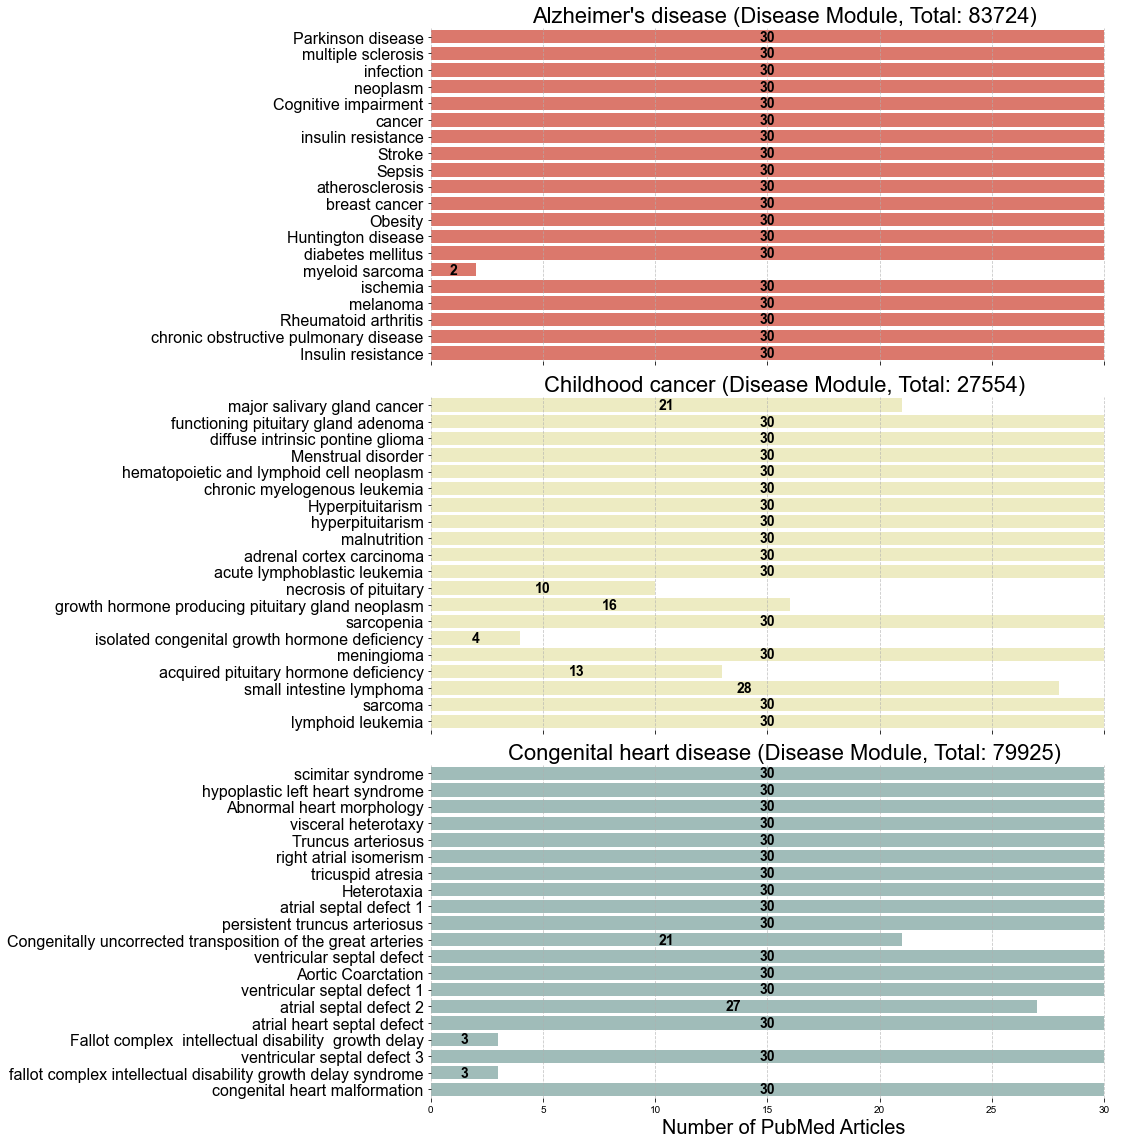

Alzheimer's disease --------------------------------------------------------------------------------
Childhood cancer --------------------------------------------------------------------------------
Congenital heart disease --------------------------------------------------------------------------------


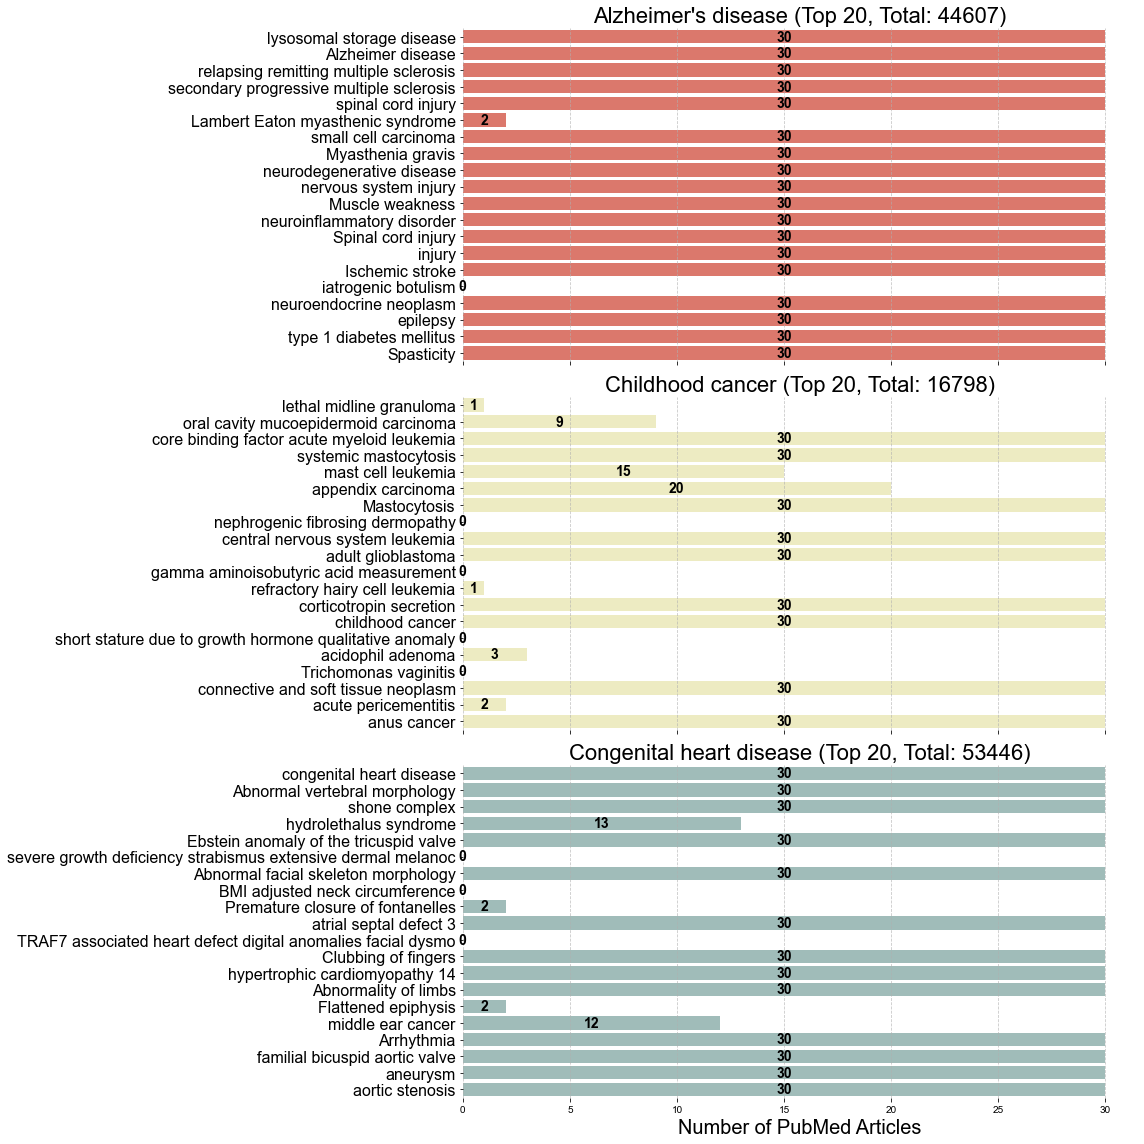

Alzheimer's disease --------------------------------------------------------------------------------
Childhood cancer --------------------------------------------------------------------------------
Congenital heart disease --------------------------------------------------------------------------------


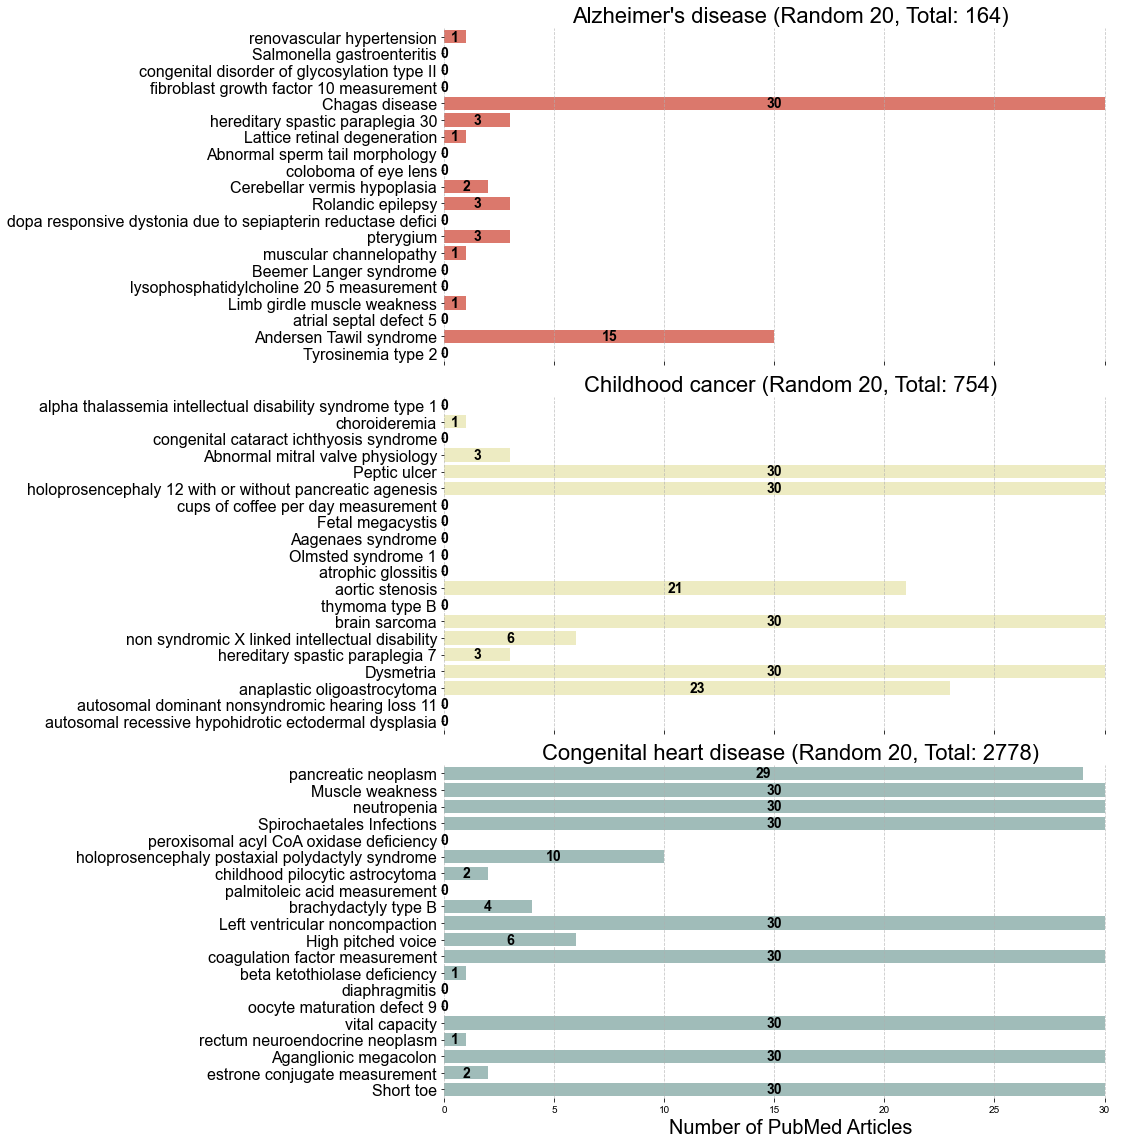

‚úÖ Visualization complete.


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

TOP_DISEASE_NUM = 20
plt.rcParams['font.family'] = 'Arial'

# Visualization
for csv_files, info in zip(all_files, subset):
    fig, axes = plt.subplots(3, 1, figsize=(16, 16), sharex=True)
    colors = ['#ed6a5a', '#f4f1bb', '#9bc1bc']

    for i, (explored_disease, path) in enumerate(csv_files.items()):
        ax = axes[i]

        # Load results from CSV
        sufix = ''  #'_1000' if info != 'Disease_module' else ''
        disname = explored_disease.replace(' ', '_')#.replace('\'s', '')
        df_results = pd.read_csv(f"{disname}_pubmed_results_nolit_{info}{sufix}.csv").head(TOP_DISEASE_NUM)

        # Get total number of articles
        top_total = df_results["Articles"].sum()
        df_results.loc[:, 'Articles'] = df_results['Articles'].apply(lambda x: 30 if x > 30 else x)

        # Plot results
        sns.barplot(data=df_results, x="Articles", y="Disease", color=colors[i], ax=ax)
        ax.set_xlabel("Number of PubMed Articles", size=20)
        ax.set_ylabel(None)
        ax.grid(axis="x", linestyle="--", alpha=0.7)
        ax.set_yticks(ax.get_yticks())  # Ensure ticks are set before setting labels
        ax.set_yticklabels([x[:60] for x in df_results['Disease']], size=16)
        ax.set_frame_on(False)

        if info == 'Disease_module':
            ax.set_title(f"{explored_disease} (Disease Module, Total: {top_total})", size=22)
        elif info == 'Top':
            ax.set_title(f"{explored_disease} (Top {TOP_DISEASE_NUM}, Total: {top_total})", size=22)
        else:  # Random subset
            ax.set_title(f"{explored_disease} (Random {TOP_DISEASE_NUM}, Total: {top_total})", size=22)

        # Add value labels
        for p in ax.patches:
            width = p.get_width()
            ax.text(width / 2, p.get_y() + p.get_height() / 2, f'{int(width)}',
                    ha='center', va='center', fontsize=14, color='black', fontweight='bold')

        print(explored_disease, '-' * 80)

    # Adjust layout and save the figure
    plt.tight_layout()
    plt.savefig(f"pubmed_results_nolit_{info}.png", dpi=200)
    plt.show()

print("‚úÖ Visualization complete.")


Alzheimer's disease --------------------------------------------------------------------------------
Total articles for Top: 712365
Total articles for Random: 163325
Childhood cancer --------------------------------------------------------------------------------
Total articles for Top: 504835
Total articles for Random: 109509
Congenital heart disease --------------------------------------------------------------------------------
Total articles for Top: 740394
Total articles for Random: 176331


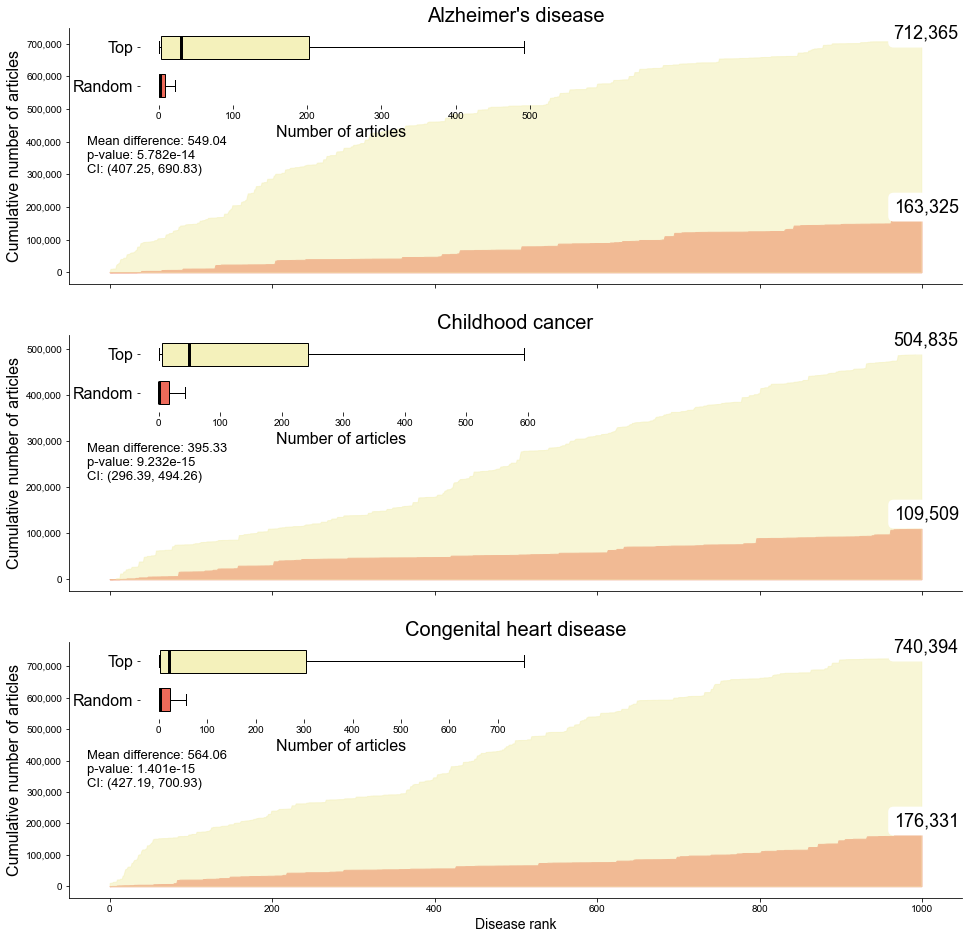

In [9]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np

# Set the font to Arial for everything
plt.rcParams['font.family'] = 'Arial'

fig, axes = plt.subplots(3, 1, figsize=(16, 16), sharex=True)
random_color = '#ed6a5a'
top_color = '#f4f1bb'
for i, explored_disease in enumerate(csv_files.keys()):
    print(explored_disease, '-'*80)
    df_all = pd.DataFrame()
    ax = axes[i]
    
    # Stacked plot for Top and Random
    for info in ['Top', 'Random']:
        disname = explored_disease.replace(' ', '_')#.replace('\'s', '')
        df_results = pd.read_csv(f"{disname}_pubmed_results_nolit_{info}.csv")
        df_all[info] = df_results['Articles']
        
        # Get total number of articles
        total_articles = df_results["Articles"].sum()
        print(f"Total articles for {info}: {total_articles}")
        
        # Annotate the total number of articles for each category (Top/Random)
        ax.annotate(f"{total_articles:,}", 
                    xy=(0.96, 0.98 if info == 'Top' else 0.3), 
                    xycoords="axes fraction", 
                    ha="center", 
                    va="center", 
                    fontsize=18, 
                    color='black', 
                    bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))
    
    df_all['Top_Cumulative'] = df_all['Top'].cumsum()
    df_all['Random_Cumulative'] = df_all['Random'].cumsum()
    
    # Fill between for stacked plot
    ax.fill_between(df_all.index, 0, df_all['Random_Cumulative'], color=random_color, alpha=1.0, label="Random")
    ax.fill_between(df_all.index, 0, df_all['Top_Cumulative'], color=top_color, alpha=0.6, label="Top")

    formatter = FuncFormatter(lambda x, _: f"{x:,.0f}")
    # Apply the formatter to the y-axis
    ax.yaxis.set_major_formatter(formatter)
    ax.set_ylabel('Cumulative number of articles', size=16)
    
    # *************** Create horizontal boxplots inside each subplot
    ax_inset = ax.inset_axes([0.08, 0.7, 0.45, 0.3])  # Positioning the inset boxplot (x, y, width, height)
    
    # Plot the boxplots with wider boxes
    box = ax_inset.boxplot([df_all['Random'], df_all['Top']], vert=False, patch_artist=True, showfliers=False,
                           widths=0.6,  # Make boxes wider (adjust as needed)
                           medianprops=dict(color='black', linewidth=3))  # Median line color
    ax_inset.spines['top'].set_visible(False)
    ax_inset.spines['right'].set_visible(False)
    ax_inset.spines['left'].set_visible(False)
    ax_inset.spines['bottom'].set_visible(False)
    
    # Color the boxes manually
    box['boxes'][1].set_facecolor(top_color)  # Top box color
    box['boxes'][0].set_facecolor(random_color)  # Random box color
    # Adding labels for the boxplot
    ax_inset.set_yticklabels(['Random', 'Top'], size=16)
    ax_inset.set_xlabel("Number of articles", size=16)
    # *******************************************************************

    # T-test between Top and Random distributions
    t_stat, p_value = stats.ttest_ind(df_all['Top'], df_all['Random'], equal_var=False)
    
    # Calculate Confidence Interval for the difference in means
    mean_diff = np.mean(df_all['Top']) - np.mean(df_all['Random'])
    std_diff = np.sqrt(np.var(df_all['Top'], ddof=1) / len(df_all['Top']) + np.var(df_all['Random'], ddof=1) / len(df_all['Random']))
    ci_low = mean_diff - 1.96 * std_diff
    ci_high = mean_diff + 1.96 * std_diff

    # Display Mean Difference, p-value, and Confidence Interval on the plot
    ax.annotate(f"Mean difference: {mean_diff:.2f}\np-value: {p_value:.3e}\nCI: ({ci_low:.2f}, {ci_high:.2f})", 
                xy=(0.02, 0.50), 
                xycoords="axes fraction", 
                ha="left", 
                va="center", 
                fontsize=13, 
                color='black', 
                bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))
    
    ax.set_title(explored_disease, size=20)
    # Remove legend
    ax.legend().set_visible(False)

# Remove the box around the subplots
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.xlabel("Disease rank", size=14)
plt.savefig(f"pubmed_cum_results_nolit_{info}.png", dpi=200, bbox_inches='tight')
plt.show()
